In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
dropped_column = data.pop('ocean_proximity')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


## Split into training and test data

In [8]:
# separate the variable we are testing for. X drops the column and y places it into its own variable
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [9]:
# test 20% of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2671,-115.73,33.09,27.0,452.0,103.0,258.0,61.0,2.9000,87500.0
14154,-117.07,32.77,34.0,2245.0,394.0,1849.0,429.0,3.5446,185500.0
1001,-121.77,37.68,36.0,1687.0,372.0,950.0,372.0,3.5532,158400.0
4975,-118.28,34.00,44.0,2636.0,725.0,2182.0,651.0,1.4320,124000.0
11511,-118.11,33.73,32.0,1258.0,333.0,645.0,334.0,5.0476,500001.0
...,...,...,...,...,...,...,...,...,...
7426,-118.20,33.95,35.0,1924.0,520.0,2101.0,541.0,2.4267,151500.0
8765,-118.38,33.81,41.0,1889.0,301.0,802.0,278.0,6.0150,488500.0
6527,-118.05,34.06,45.0,531.0,164.0,722.0,166.0,2.1406,162500.0
13641,-117.33,34.05,26.0,613.0,149.0,431.0,130.0,1.3977,73100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

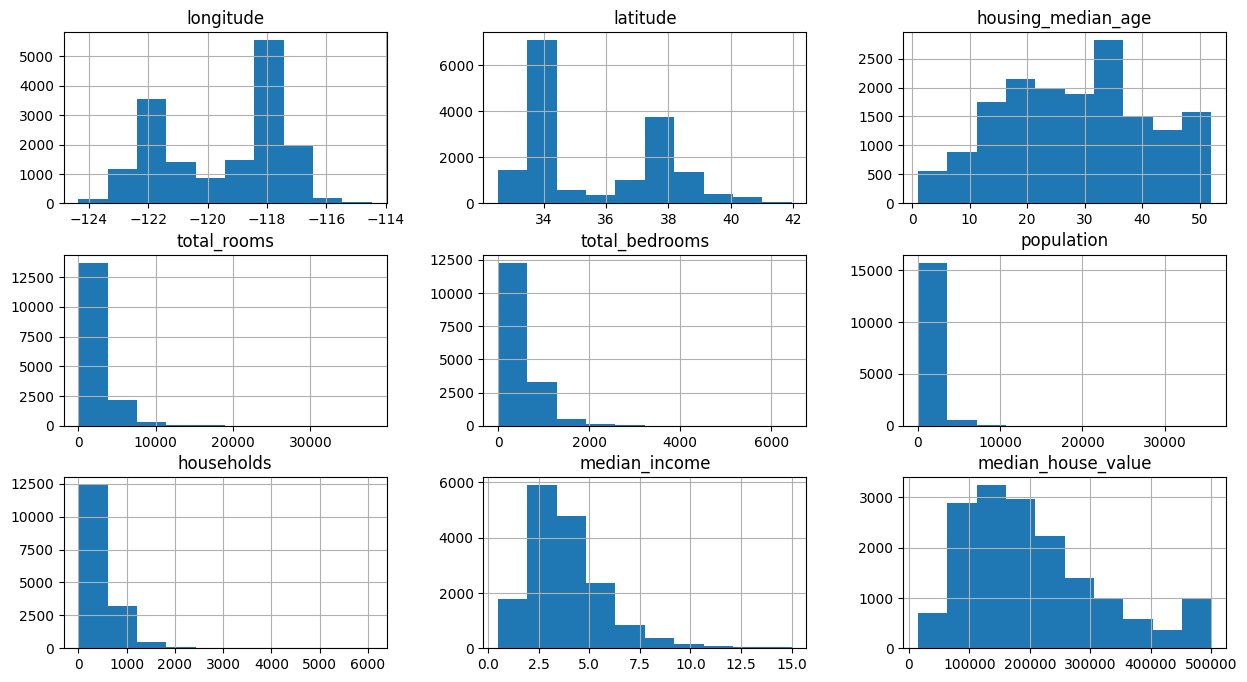

In [11]:
train_data.hist(figsize=(15,8))

In [12]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924525,-0.109563,0.049306,0.072125,0.102413,0.058595,-0.014131,-0.043524
latitude,-0.924525,1.000000,0.012191,-0.042531,-0.071703,-0.113357,-0.076321,-0.081383,-0.146691
housing_median_age,-0.109563,0.012191,1.000000,-0.356862,-0.315758,-0.288807,-0.297000,-0.112575,0.106725
total_rooms,0.049306,-0.042531,-0.356862,1.000000,0.929526,0.850797,0.917110,0.199144,0.139378
total_bedrooms,0.072125,-0.071703,-0.315758,0.929526,1.000000,0.873688,0.979273,-0.008235,0.053364
population,0.102413,-0.113357,-0.288807,0.850797,0.873688,1.000000,0.903621,0.002767,-0.022144
households,0.058595,-0.076321,-0.297000,0.917110,0.979273,0.903621,1.000000,0.012692,0.069050
median_income,-0.014131,-0.081383,-0.112575,0.199144,-0.008235,0.002767,0.012692,1.000000,0.692368
median_house_value,-0.043524,-0.146691,0.106725,0.139378,0.053364,-0.022144,0.069050,0.692368,1.000000


<Axes: >

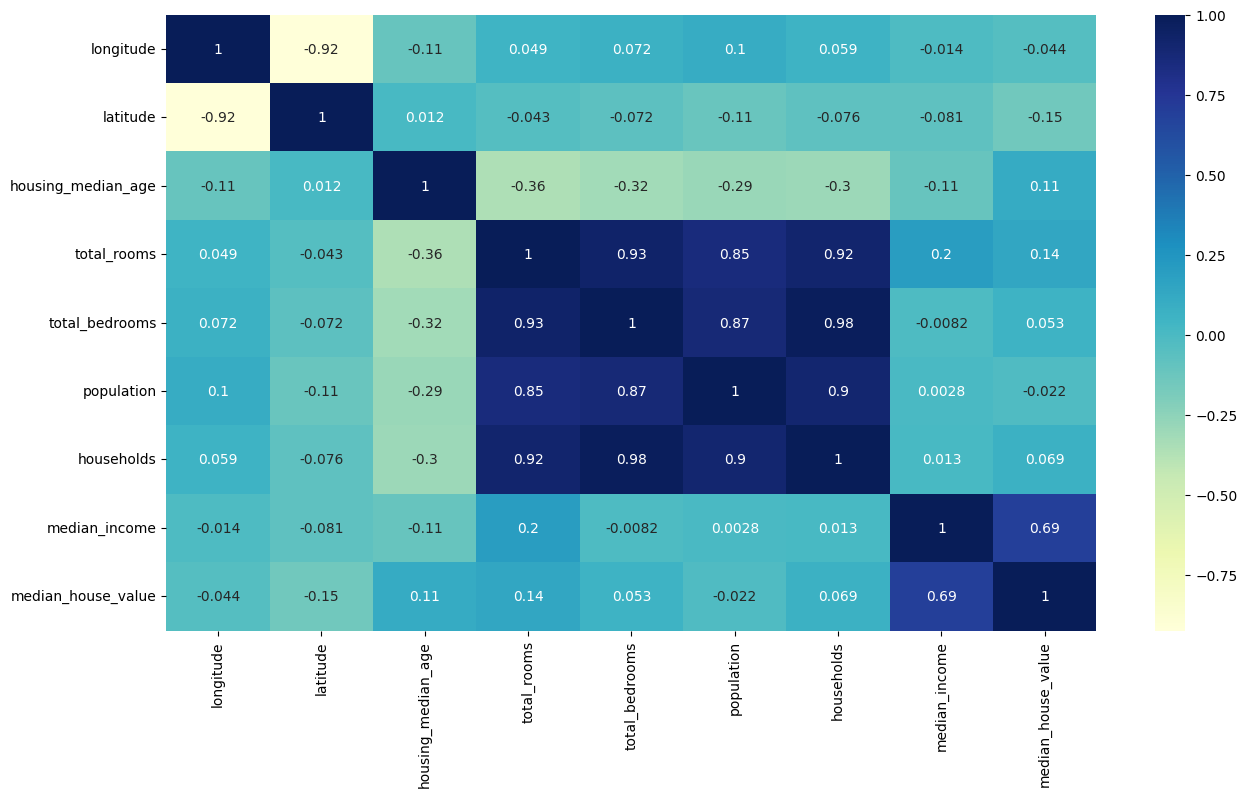

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [14]:
#  Taking the logarithm of the values can help in various scenarios such as transforming skewed data distributions 
# to more symmetric distributions or making relationships between variables more linear.
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

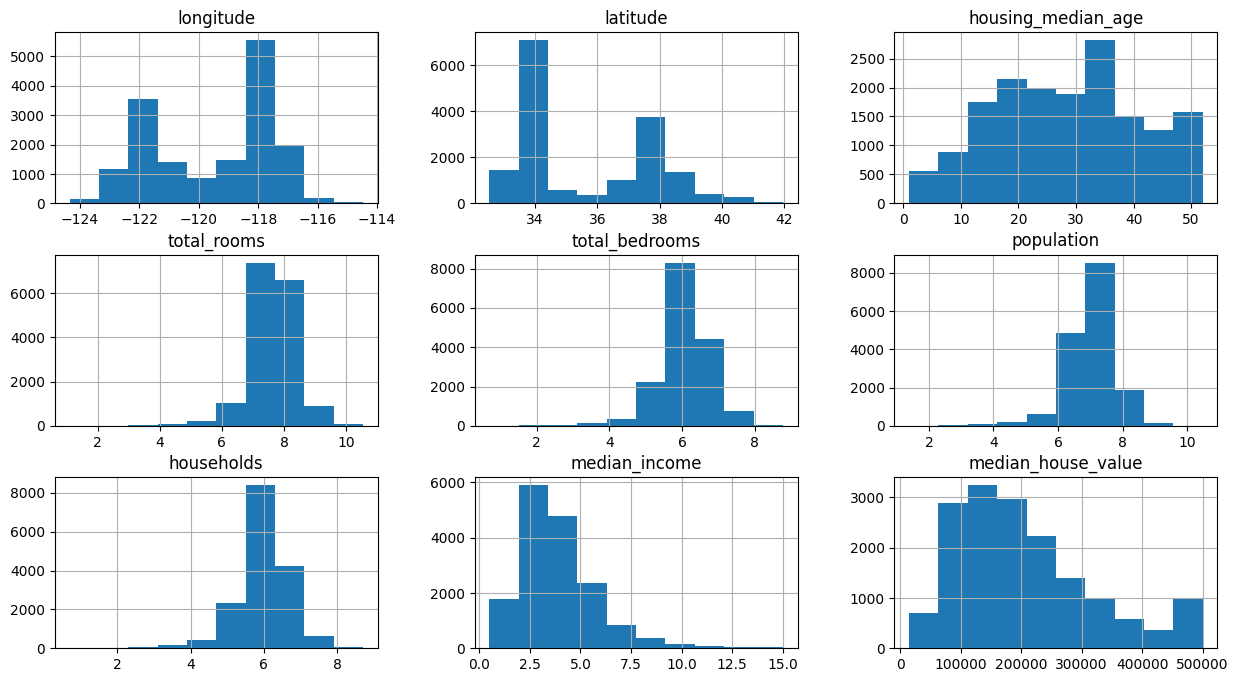

In [15]:
train_data.hist(figsize=(15,8))

In [16]:
# add the ocean_proximity columns back to df

train_data['ocean_proximity'] = dropped_column
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2671,-115.73,33.09,27.0,6.115892,4.644391,5.556828,4.127134,2.9000,87500.0,INLAND
14154,-117.07,32.77,34.0,7.716906,5.978886,7.522941,6.063785,3.5446,185500.0,NEAR OCEAN
1001,-121.77,37.68,36.0,7.431300,5.921578,6.857514,5.921578,3.5532,158400.0,INLAND
4975,-118.28,34.00,44.0,7.877397,6.587550,7.688455,6.480045,1.4320,124000.0,<1H OCEAN
11511,-118.11,33.73,32.0,7.138073,5.811141,6.470800,5.814131,5.0476,500001.0,NEAR OCEAN


In [17]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7167
INLAND        5225
NEAR OCEAN    2127
NEAR BAY      1824
ISLAND           3
Name: count, dtype: int64

In [18]:
# turn str data in ocean proximity into int's
dummy = pd.get_dummies(train_data.ocean_proximity)
dummy = dummy.astype(int)
dummy

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2671,0,1,0,0,0
14154,0,0,0,0,1
1001,0,1,0,0,0
4975,1,0,0,0,0
11511,0,0,0,0,1
...,...,...,...,...,...
7426,1,0,0,0,0
8765,0,0,0,0,1
6527,1,0,0,0,0
13641,0,1,0,0,0


In [19]:
train_data = train_data.join(dummy).drop(['ocean_proximity'], axis=1)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2671,-115.73,33.09,27.0,6.115892,4.644391,5.556828,4.127134,2.9000,87500.0,0,1,0,0,0
14154,-117.07,32.77,34.0,7.716906,5.978886,7.522941,6.063785,3.5446,185500.0,0,0,0,0,1
1001,-121.77,37.68,36.0,7.431300,5.921578,6.857514,5.921578,3.5532,158400.0,0,1,0,0,0
4975,-118.28,34.00,44.0,7.877397,6.587550,7.688455,6.480045,1.4320,124000.0,1,0,0,0,0
11511,-118.11,33.73,32.0,7.138073,5.811141,6.470800,5.814131,5.0476,500001.0,0,0,0,0,1


<Axes: xlabel='latitude', ylabel='longitude'>

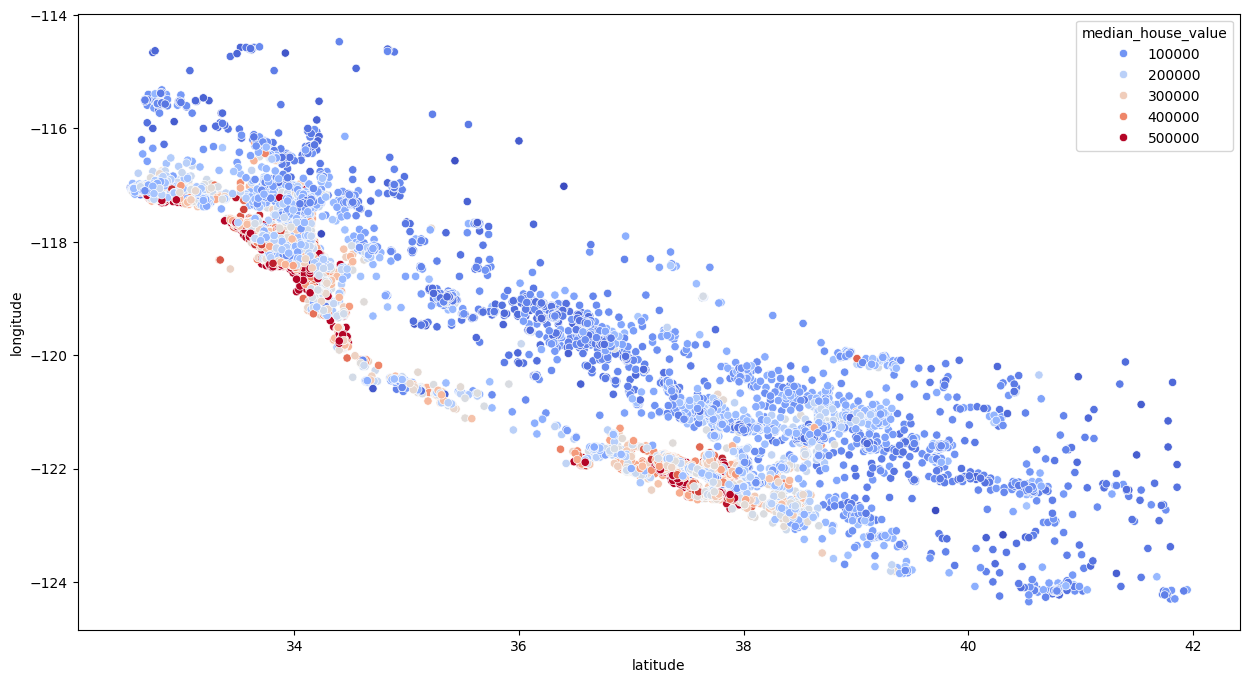

In [20]:
# median house value based on longitude and latitude...Calinfornia coastline is visible
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [21]:
# add column of bedroom to room ratio and column of househoold room to rooms ratio
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

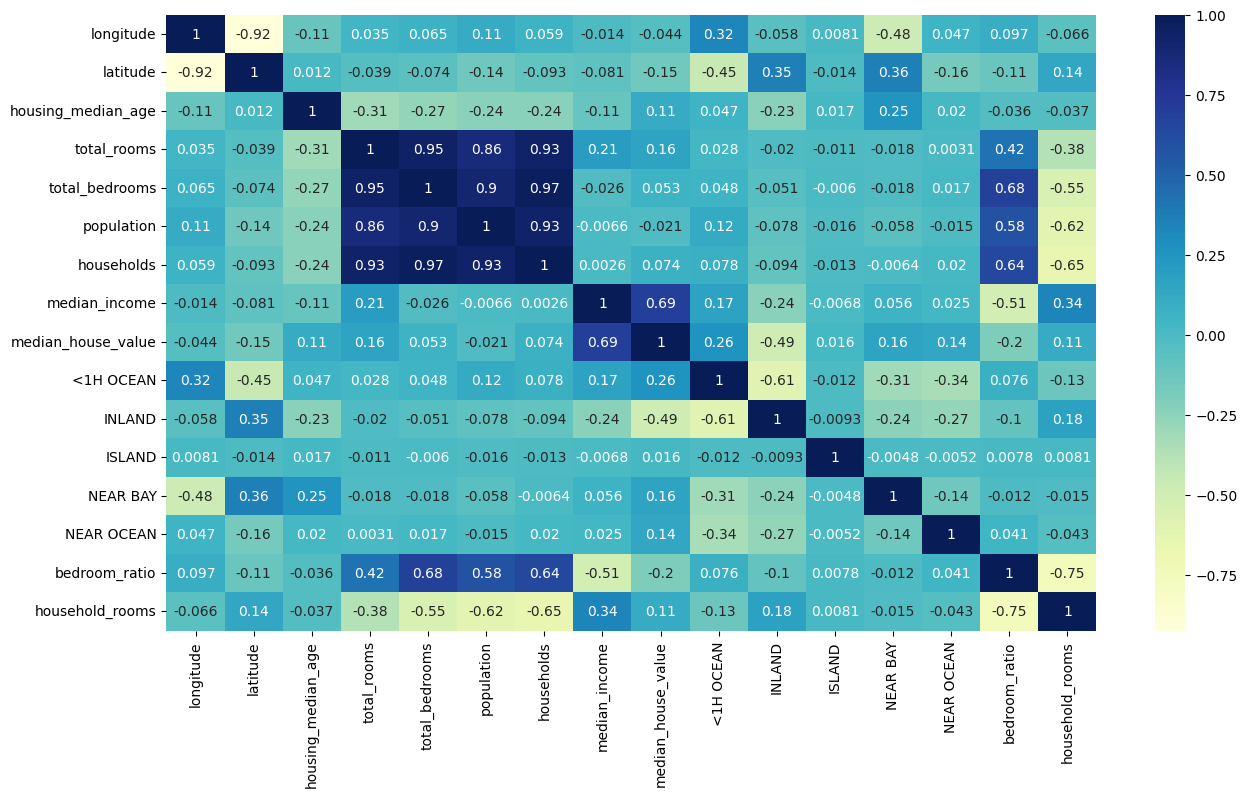

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [31]:
# must again split the data since we've added new columns and new data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
test_data = X_test.join(y_test)

# Add the 'ocean_proximity' column back to test_data
test_data['ocean_proximity'] = dropped_column

# Turn str data in ocean proximity into int's
dummy = pd.get_dummies(test_data['ocean_proximity'])
dummy = dummy.astype(int)
test_data = test_data.join(dummy).drop(['ocean_proximity'], axis=1)

# Perform any further preprocessing and feature engineering here
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


In [33]:
# Linear Regression Model
reg.score(X_test, y_test)

0.6567825241802256

In [37]:
# Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
forest.score(X_test, y_test)

0.8107222335355264

In [40]:
# GridSearch with cross validation
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [3,10,30],
    'max_features': [2,4,6,8],
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [42]:
best_forest = grid_search.best_estimator_

In [43]:
best_forest.score(X_test, y_test)

0.8064248433838707